<a href="https://colab.research.google.com/github/praveenkumar-30726/IIoT/blob/main/IIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Latest Smart Irrigation Data:
                  created_at  Soil_Moisture  Temperature  Pump_Status
15 2025-10-16 09:23:52+00:00           79.5         17.1          0.0
16 2025-10-16 09:24:13+00:00           79.5         17.1          0.0
17 2025-10-16 09:24:34+00:00           79.5         17.1          0.0
18 2025-10-16 09:24:55+00:00           79.5         17.1          0.0
19 2025-10-16 09:25:16+00:00           79.5         17.1          0.0


/tmp/ipython-input-1505727165.py:55: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1505727165.py:55: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1505727165.py:55: UserWarning: Glyph 128703 (\N{SHOWER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128703 (\N{SHOWER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


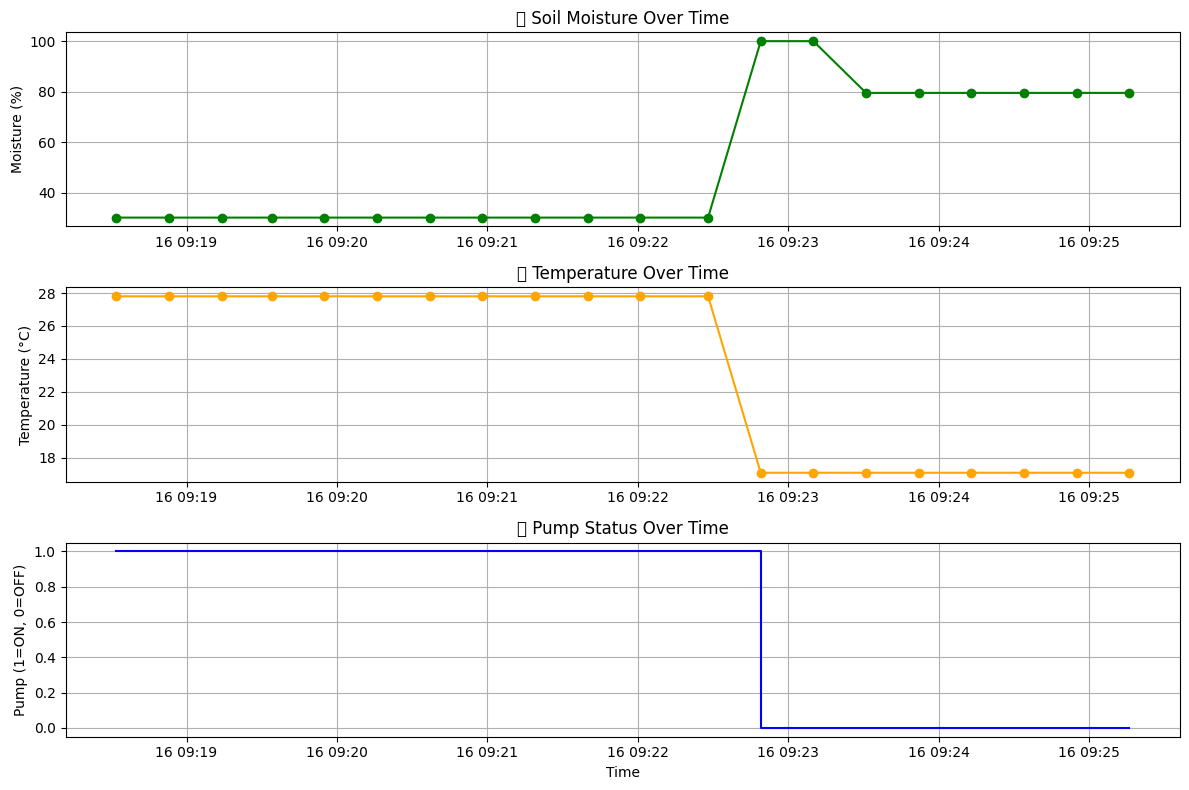

In [1]:
# 📘 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# 🔗 ThingSpeak READ API URL
url = "https://api.thingspeak.com/channels/3119564/feeds.json?api_key=CQASS9XGW1J2MWPA&results=20"

# 📡 Fetch Data from ThingSpeak
response = requests.get(url)
data = response.json()

# ✅ Convert to DataFrame
feeds = data['feeds']
df = pd.DataFrame(feeds)

# 🕒 Convert 'created_at' to readable datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# 🌡 Extract fields (update field numbers if needed)
df['Soil_Moisture'] = df['field1'].astype(float)
df['Temperature'] = df['field2'].astype(float)
df['Pump_Status'] = df['field3'].astype(float)

# 📋 Display the latest data
print("✅ Latest Smart Irrigation Data:")
print(df[['created_at', 'Soil_Moisture', 'Temperature', 'Pump_Status']].tail())

# 📈 Plot Graphs
plt.figure(figsize=(12, 8))

# --- Soil Moisture ---
plt.subplot(3, 1, 1)
plt.plot(df['created_at'], df['Soil_Moisture'], color='green', marker='o')
plt.title('🌱 Soil Moisture Over Time')
plt.ylabel('Moisture (%)')
plt.grid(True)

# --- Temperature ---
plt.subplot(3, 1, 2)
plt.plot(df['created_at'], df['Temperature'], color='orange', marker='o')
plt.title('🌡 Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# --- Pump Status ---
plt.subplot(3, 1, 3)
plt.step(df['created_at'], df['Pump_Status'], where='post', color='blue')
plt.title('🚿 Pump Status Over Time')
plt.ylabel('Pump (1=ON, 0=OFF)')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()
